In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup_50=pd.read_csv("50_Startups.csv")

In [3]:
startup_50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup_50.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup_50.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


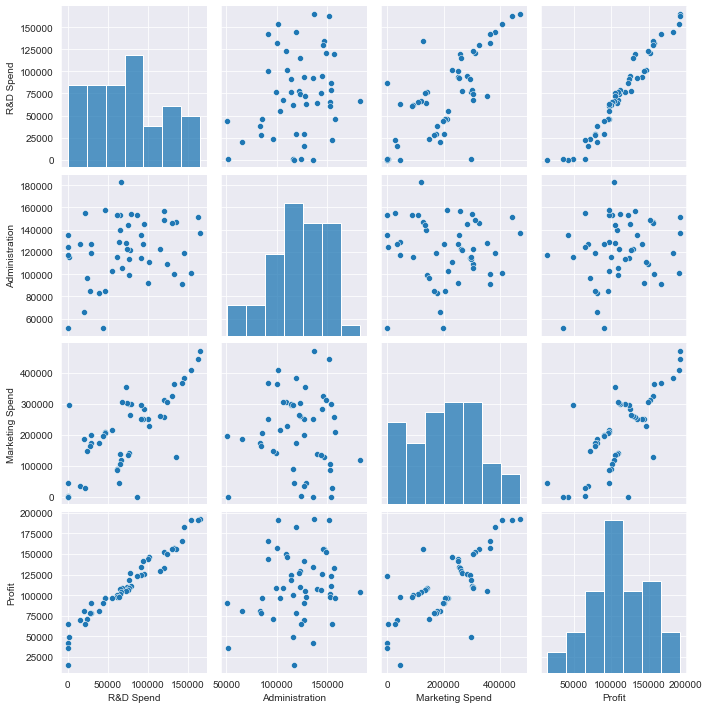

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_50);

In [14]:
import statsmodels.formula.api as smf
model =smf.ols('Profit~R&D Spend+Administration+Marketing Spend',data=startup_50).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [8]:
startup_50.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
startup_50.rename(columns ={'R&D Spend':'R&D_Spend'}, inplace=True)

In [11]:
startup_50.rename(columns ={'Marketing Spend':'Marketing_Spend'}, inplace=True)

In [12]:
startup_50.columns

Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [13]:
model =smf.ols('Profit~R&D_Spend+Administration+Marketing_Spend',data=startup_50).fit()

PatsyError: Error evaluating factor: NameError: name 'R' is not defined
    Profit~R&D_Spend+Administration+Marketing_Spend
           ^^^^^^^^^

In [14]:
startup_50.rename(columns ={'R&D_Spend':'Research_Spend'}, inplace=True)

In [15]:
model =smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data=startup_50).fit()

In [16]:
model.params

Intercept          50122.192990
Research_Spend         0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [17]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
Research_Spend     17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
Research_Spend     2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [19]:
startup_50.columns

Index(['Research_Spend', 'Administration', 'Marketing_Spend', 'State',
       'Profit'],
      dtype='object')

In [20]:
profit_research=smf.ols('Profit~Research_Spend',data=startup_50).fit()
print(profit_research.tvalues, '\n', profit_research.pvalues)
(profit_research.rsquared,profit_research.rsquared_adj)

Intercept         19.320288
Research_Spend    29.151139
dtype: float64 
 Intercept         2.782697e-24
Research_Spend    3.500322e-32
dtype: float64


(0.9465353160804393, 0.9454214684987817)

In [21]:
profit_admin=smf.ols('Profit~Administration',data=startup_50).fit()
print(profit_admin.tvalues, '\n', profit_admin.pvalues)
(profit_admin.rsquared,profit_admin.rsquared_adj)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


(0.04028714077757223, 0.020293122877105052)

In [22]:
profit_marketing=smf.ols('Profit~Marketing_Spend',data=startup_50).fit()
print(profit_marketing.tvalues, '\n', profit_marketing.pvalues)
(profit_marketing.rsquared,profit_marketing.rsquared_adj)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


(0.5591535746115515, 0.5499692740826254)

In [23]:
profit_State=smf.ols('Profit~State',data=startup_50).fit()
print(profit_State.tvalues, '\n', profit_State.pvalues)
(profit_State.rsquared,profit_State.rsquared_adj)

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


(0.023875218249123975, -0.017662006506232508)

In [24]:
 startup_50.columns

Index(['Research_Spend', 'Administration', 'Marketing_Spend', 'State',
       'Profit'],
      dtype='object')

In [25]:
rsq_research_spend = smf.ols('Research_Spend~Administration+Marketing_Spend+State',data=startup_50).fit().rsquared  
vif_research_spend = 1/(1-rsq_research_spend)

rsq_admin = smf.ols('Administration~Research_Spend+Marketing_Spend+State',data=startup_50).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_marketing = smf.ols('Marketing_Spend~Research_Spend+Administration+State',data=startup_50).fit().rsquared
vif_marketing = 1/(1-rsq_marketing)

data_1 ={'Variables':['Research_Spend', 'Administration', 'Marketing_Spend'],'VIF':[vif_research_spend,vif_admin,vif_marketing,]}

Vif_frame = pd.DataFrame(data_1)

Vif_frame

,Variables,VIF
0,Research_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797


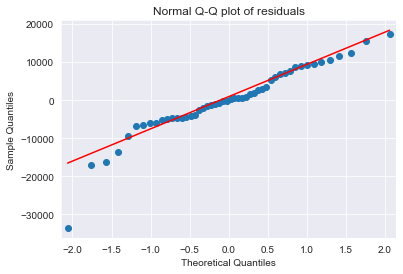

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

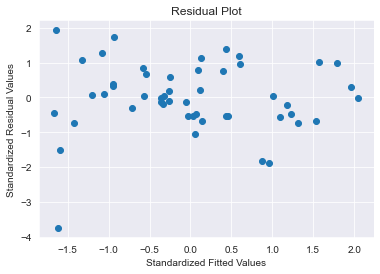

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

eval_env: 1


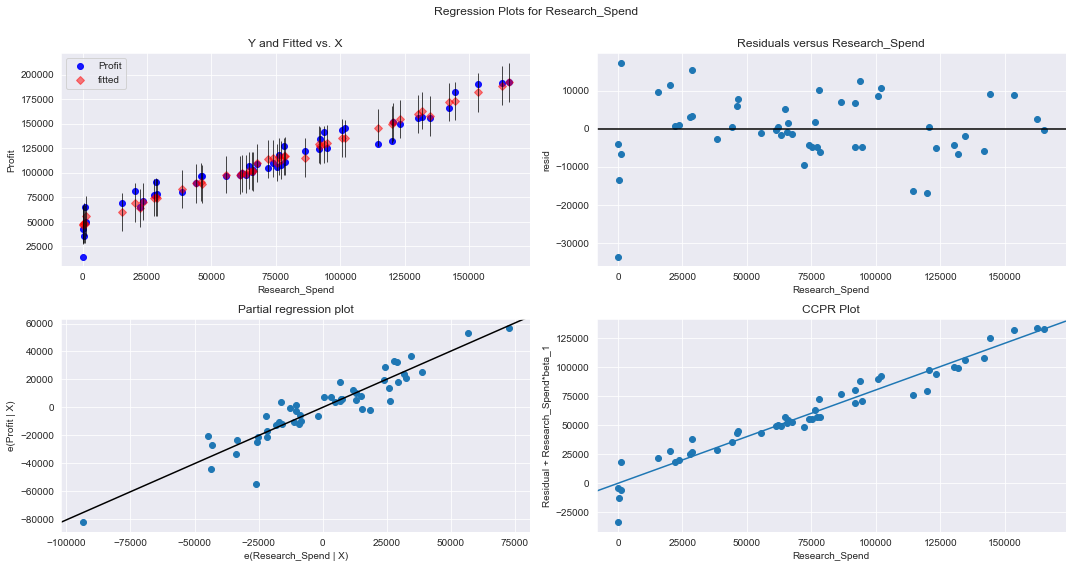

In [30]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "Research_Spend", fig=fig)
plt.show()

eval_env: 1


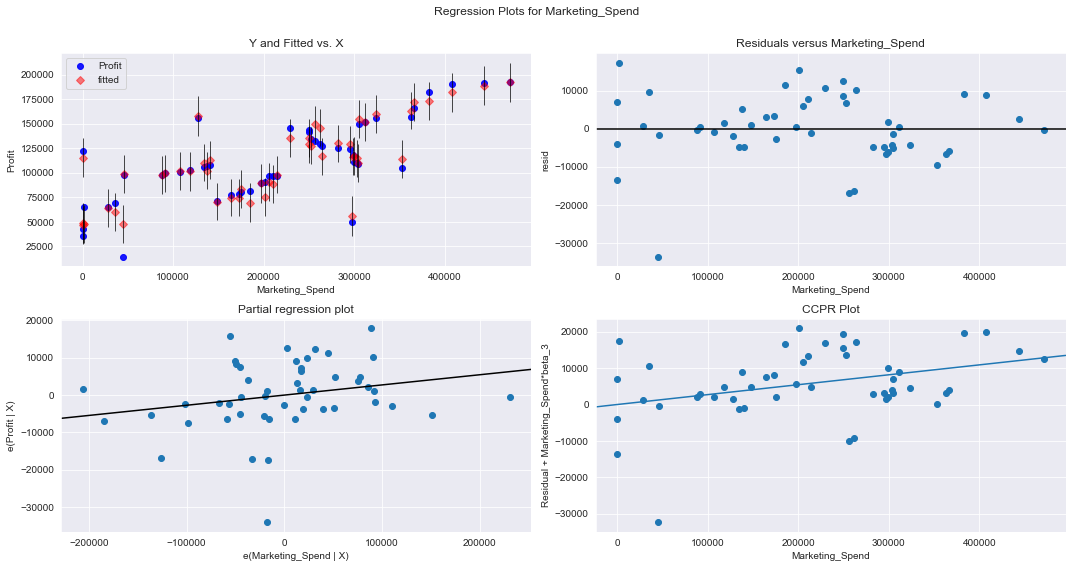

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

eval_env: 1


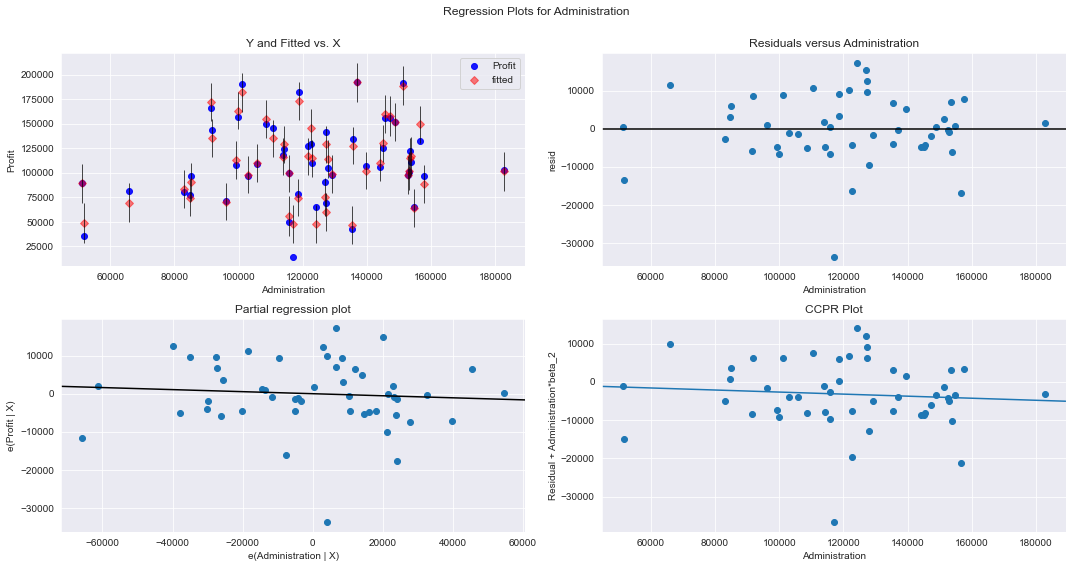

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [33]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

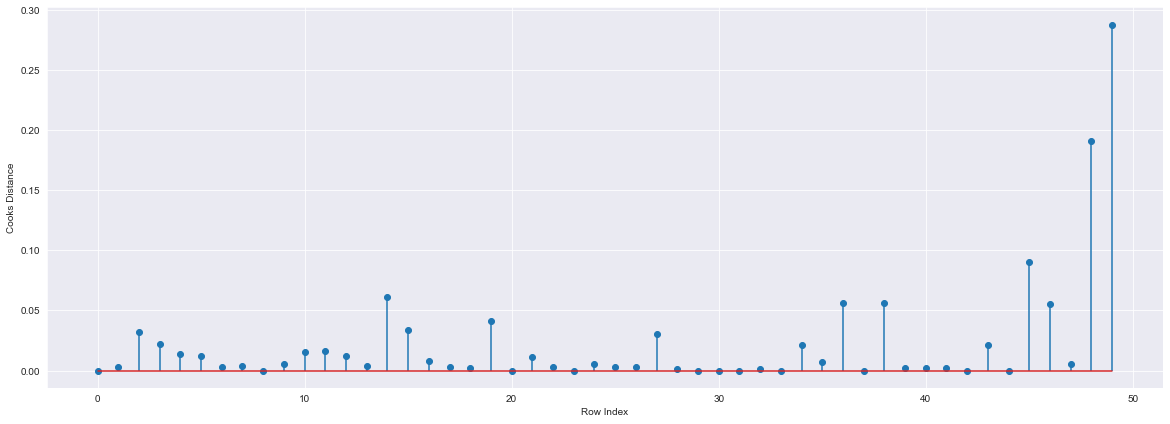

In [34]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_50)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

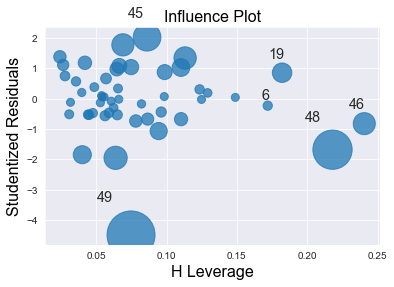

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
k = startup_50.shape[1]
n = startup_50.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [40]:
print(leverage_cutoff)

0.36


In [41]:
startup_50[startup_50.index.isin([48, 49])]

,Research_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [42]:
startup_50.head()

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
startup_50_new = pd.read_csv("50_Startups.csv")

In [44]:
startup_50_1=startup_50_new.drop(startup_50_new.index[[48,49]],axis=0).reset_index()

In [45]:
startup_50_1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
startup_50_1=startup_50_1.drop(['index'],axis=1)

In [47]:
startup_50_1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [67]:
startup_50_1.rename(columns ={'R&D_Spend':'Research_Spend'}, inplace=True)

In [68]:
startup_50_1.rename(columns ={'Marketing Spend':'Marketing_Spend'}, inplace=True)

In [69]:
startup_50_1

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [71]:
final_startup_50_1=smf.ols('Profit~Research_Spend+Marketing_Spend+Administration',data=startup_50_1).fit()

In [72]:
(final_startup_50_1.rsquared_adj,final_startup_50_1.aic,final_startup_50_1.bic)

(0.9601318409177761, 994.6690439260116, 1002.1538479696432)

In [73]:
model_influence_A = final_startup_50_1.get_influence()
(c_A, _) = model_influence_A.cooks_distance

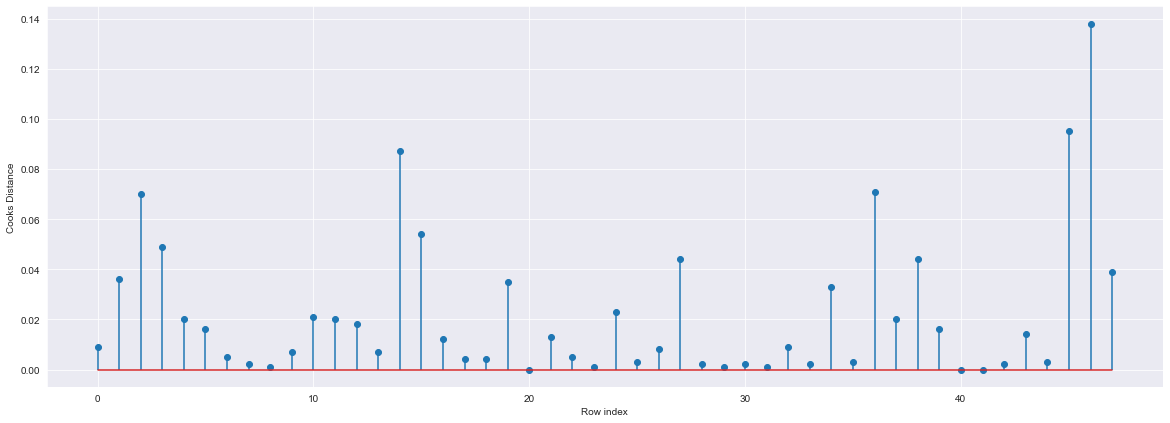

In [77]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_50_1)),np.round(c_A,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [78]:
(np.argmax(c_A),np.max(c_A))

(46, 0.1382913399433431)

In [81]:
startup_50_2=startup_50_1.drop(startup_50_1.index[[45,46]],axis=0)

In [82]:
startup_50_2

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [83]:
startup_50_3=startup_50_2.reset_index()

In [84]:
startup_50_4=startup_50_3.drop(['index'],axis=1)

In [85]:
startup_50_4

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [90]:
final_startup_50_4= smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data = startup_50_4).fit()

In [91]:
model_influence_V = final_startup_50_4.get_influence()
(c_V, _) = model_influence_V.cooks_distance

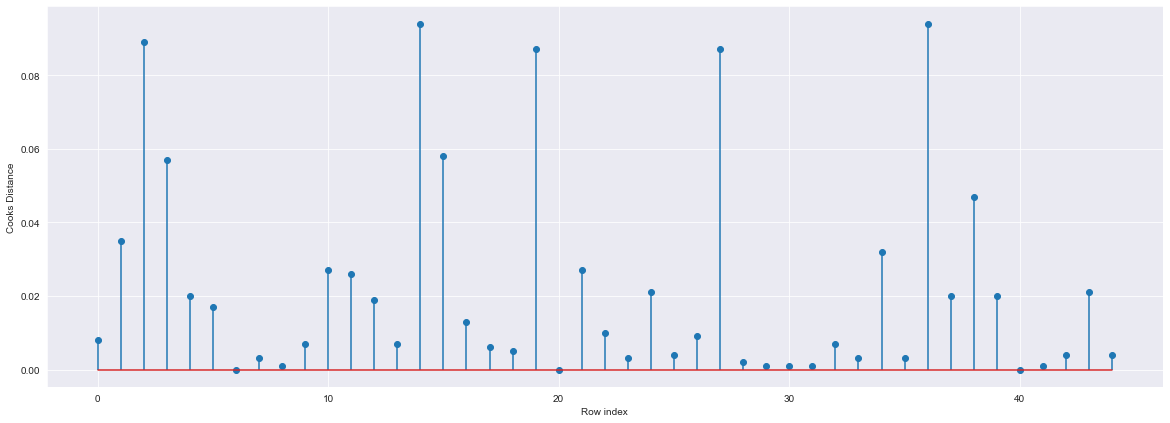

In [93]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_50_4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [94]:
(np.argmax(c_V),np.max(c_V))

(36, 0.09447839510048132)

In [95]:
final_startup_50_4= smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data = startup_50_4).fit()

In [97]:
(final_startup_50_4.rsquared,final_startup_50_4.rsquared_adj)

(0.9593833720271211, 0.9564114236388617)

In [100]:
(final_startup_50_4.rsquared_adj,final_startup_50_4.aic,final_startup_50_4.bic)

(0.9564114236388617, 929.3587038526764, 936.5853538117577)

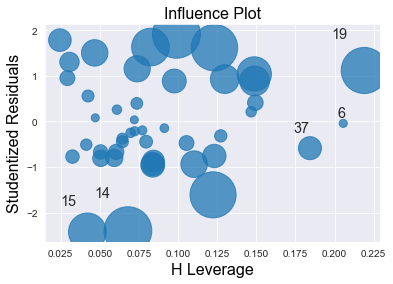

In [101]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_startup_50_4)
plt.show()

In [102]:
startup_50_5=startup_50_4.drop(startup_50_4.index[[14,15,19,37]],axis=0)

In [103]:
startup_50_5

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [104]:
final_startup_50_5= smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data = startup_50_5).fit()

In [105]:
model_influence_V = final_startup_50_5.get_influence()
(c_V, _) = model_influence_V.cooks_distance

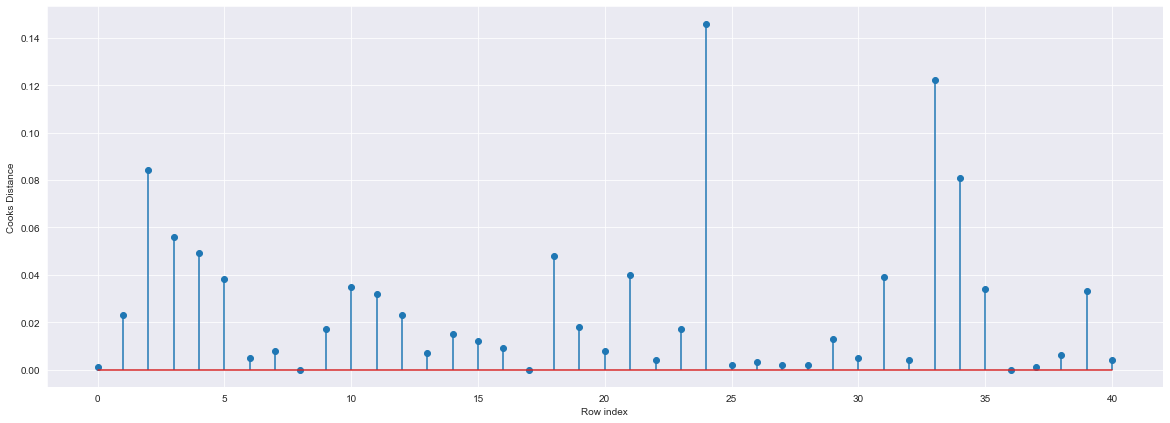

In [106]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_50_5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [107]:
(np.argmax(c_V),np.max(c_V))

(24, 0.14644784033021635)

In [108]:
final_startup_50_5= smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data = startup_50_5).fit()

In [109]:
(final_startup_50_5.rsquared_adj,final_startup_50_5.aic,final_startup_50_5.bic)

(0.9679289222871426, 837.4383909915042, 844.2926792583214)

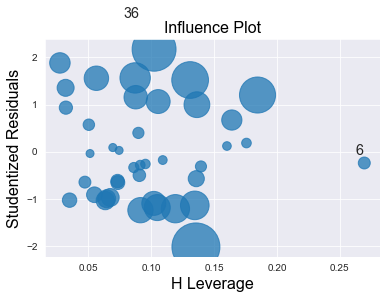

In [110]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_startup_50_5)
plt.show()

In [111]:
startup_50_6=startup_50_5.drop(startup_50_5.index[[6,36]],axis=0)

In [112]:
startup_50_6

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96
10,101913.08,110594.11,229160.95,Florida,146121.95


In [113]:
final_startup_50_6= smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data = startup_50_6).fit()

In [114]:
model_influence_V = final_startup_50_6.get_influence()
(c_V, _) = model_influence_V.cooks_distance

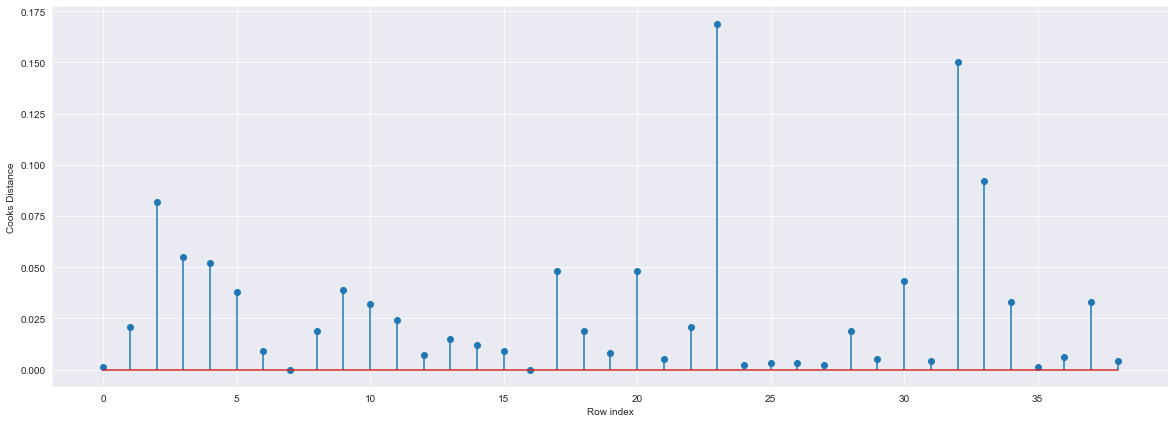

In [115]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_50_6)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [116]:
startup_50_7=startup_50_6.drop(startup_50_6.index[[24,32,33]],axis=0)

In [117]:
startup_50_7

,Research_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96
10,101913.08,110594.11,229160.95,Florida,146121.95


In [118]:
final_startup_50_7= smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data = startup_50_7).fit()

In [119]:
model_influence_V = final_startup_50_7.get_influence()
(c_V, _) = model_influence_V.cooks_distance

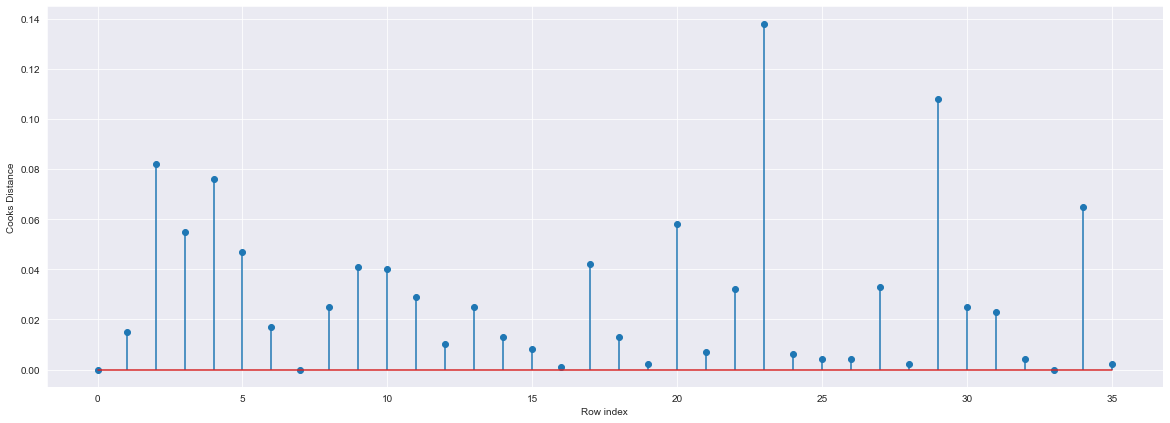

In [120]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_50_7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [121]:
(np.argmax(c_V),np.max(c_V))

(23, 0.13841559122014044)

In [122]:
final_startup_50_7= smf.ols('Profit~Research_Spend+Administration+Marketing_Spend',data = startup_50_7).fit()

In [123]:
(final_startup_50_7.rsquared_adj,final_startup_50_7.aic,final_startup_50_7.bic)

(0.9698237520630107, 733.775244219696, 740.1093199735204)

In [126]:
new_data=pd.DataFrame({'Research_Spend':80000,"Administration":130000,"Marketing_Spend":250000},index=[1])

In [127]:
final_startup_50_7.predict(new_data)

1    118551.069246
dtype: float64

In [130]:
final_startup_50_7.predict(startup_50_7.iloc[0:5,])

0    192266.725124
1    188897.498078
2    183082.519112
3    174391.137496
4    173512.553926
dtype: float64